In [20]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merge_df = city_df.merge(ride_df, how="left", on=["city", "city"])
merge_df = merge_df.drop_duplicates()

# Display the data table for preview
merge_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [21]:
merge_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [22]:
#Average Fare ($) Per City ====> x_axis
avg_fare = merge_df.groupby("city")['fare'].mean()
avg_fare.head()

city
Amandaburgh      24.641667
Barajasview      25.332273
Barronchester    36.422500
Bethanyland      32.956111
Bradshawfurt     40.064000
Name: fare, dtype: float64

In [23]:
tol_rides=merge_df.groupby("city").ride_id.count()
#tol_rides.head()

In [24]:
#Total Number of Drivers Per City
tol_drivers=merge_df.groupby("city").driver_count.sum()
tol_drivers.head()

city
Amandaburgh      216
Barajasview      572
Barronchester    176
Bethanyland      396
Bradshawfurt      70
Name: driver_count, dtype: int64

In [25]:
#City Type (Urban, Suburban, Rural)
city_typ=city_df.set_index("city").type
#city_typ

In [34]:
# Creat a new DF 
pyber_df =pd.DataFrame({"Avg Fare":avg_fare, "Total Rides":tol_rides,
                        "Total Drivers":tol_drivers, "city type":city_typ })
pyber_df.head()

,Avg Fare,Total Rides,Total Drivers,city type
Amandaburgh,24.641667,18,216,Urban
Barajasview,25.332273,22,572,Urban
Barronchester,36.422500,16,176,Suburban
Bethanyland,32.956111,18,396,Suburban
Bradshawfurt,40.064000,10,70,Rural


In [38]:
# total rides per city for each type ===> X_axis
Urb=pyber_df.loc[pyber_df['city type']=='Urban']
Sub=pyber_df.loc[pyber_df['city type']=='Suburban']
Rur=pyber_df.loc[pyber_df['city type']=='Rural']
Urb.sort_values(by=['Total Rides']).tail()

,Avg Fare,Total Rides,Total Drivers,city type
Liumouth,26.150000,33,2277,Urban
Port Frank,27.201515,33,759,Urban
North Jason,22.743714,35,210,Urban
South Karenland,26.535526,38,152,Urban
West Angela,25.990000,39,1872,Urban


In [9]:
# Y_axis tol_ride
ride_typ=pyber_df.groupby('city type')
ride_typ.sum()

,Avg Fare,Total Rides,Total Drivers
city type,,,
Rural,623.479771,125,537
Suburban,1106.542729,625,8570
Urban,1616.942033,1625,59602


In [10]:
#plt.title('Pyber Ride Sharing Data (2016)')

## Bubble Plot of Ride Sharing Data

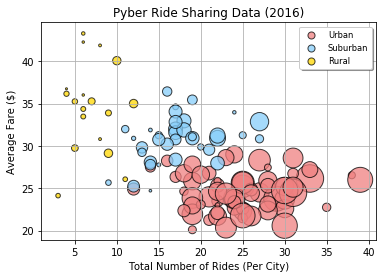

In [11]:
# Obtain the x and y coordinates for each of the three city types
Rur_X=Rur['Total Rides']
Rur_Y=Rur['Avg Fare']
Rur_Z=Rur['Total Drivers']

Urb_X=Urb['Total Rides']
Urb_Y=Urb['Avg Fare']
Urb_Z=Urb['Total Drivers']

Sub_X=Sub['Total Rides']
Sub_Y=Sub['Avg Fare']
Sub_Z=Sub['Total Drivers']
# Build the scatter plots for each city types 

Urb_plot=plt.scatter(Urb_X,Urb_Y,color ='lightcoral',alpha=0.75,s=Urb_Z/3, edgecolor ='black',label="Urban",linewidths=1)

Sub_plot=plt.scatter(Sub_X,Sub_Y,color='lightskyblue',alpha=0.75,s=Sub_Z/2, edgecolor='black',label="Suburban",linewidths=1)

Rur_plot=plt.scatter(Rur_X,Rur_Y,color ='Gold',alpha=0.75, s=Rur_Z, edgecolor ='black', label="Rural", linewidths=1)


# Incorporate the other graph properties
plt.title('Pyber Ride Sharing Data (2016)')
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")

# Create a legend
lgnd = plt.legend(handles=[Urb_plot,Sub_plot,Rur_plot], loc="best", shadow=True, fontsize='small', frameon=True,
           handletextpad=1, facecolor='white', markerscale=1)

# Incorporate a text label regarding circle size
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]

# Save Figure
plt.savefig=("Pyber_scatter.png")
plt.grid()
plt.show()

## Total Fares by City Type

In [12]:
##% of Total Fares by City Type
fare = merge_df.groupby("type")['fare'].sum()
fare_percent=fare/2375*100
fare.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [13]:
labels=['Rural', 'Suburban', 'Urban']
sizes=fare_percent
colors=['gold','lightskyblue','lightcoral']
explode = (0, 0, 0.1)

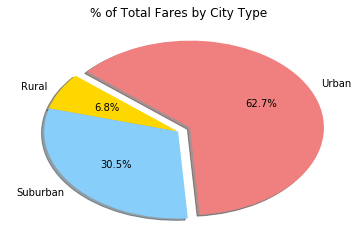

In [14]:
## Build Pie Chart

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('% of Total Fares by City Type')

# Save Figure
plt.savefig=("../Pyber/Pyber_Fares.pie.png")
plt.show()

## Total Rides by City Type

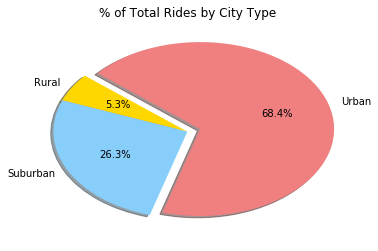

In [15]:
#% of Total Rides by City Type
rides_percent=merge_df.groupby("type")['ride_id'].count()

# Build Pie Chart
plt.pie(rides_percent, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('% of Total Rides by City Type')

# Save Figure
plt.savefig=("../Pyber/Pyber_Rides.pie.png")
plt.show()

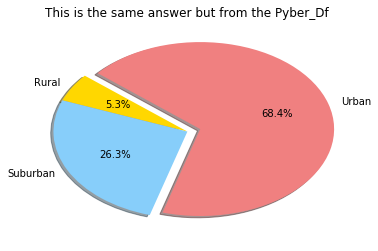

In [16]:
# another way to answer:
#% of Total Rides by City Type
rides_perc=pyber_df.groupby("city type")['Total Rides'].sum()
# Build Pie Chart
plt.pie(rides_percent, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("This is the same answer but from the Pyber_Df")
# Save Figure
plt.show()

In [17]:
pyber_df.groupby('city type')['Total Drivers'].mean()

city type
Rural        29.833333
Suburban    238.055556
Urban       903.060606
Name: Total Drivers, dtype: float64

## Total Drivers by City Type

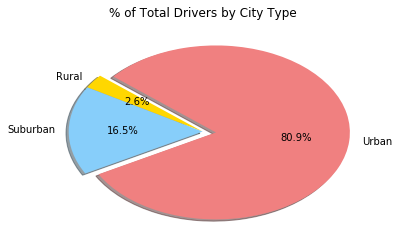

In [18]:
#% of Total Drivers by City Type
drivers_percent=city_df.groupby('type')['driver_count'].sum()

# Build Pie Charts
plt.pie(drivers_percent, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('% of Total Drivers by City Type')

# Save Figure
plt.savefig=("../Pyber/Pyber_Drivers.pie.png")
plt.show()

In [19]:
drivers_percent

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [39]:
pyber_df.head()

,Avg Fare,Total Rides,Total Drivers,city type
Amandaburgh,24.641667,18,216,Urban
Barajasview,25.332273,22,572,Urban
Barronchester,36.422500,16,176,Suburban
Bethanyland,32.956111,18,396,Suburban
Bradshawfurt,40.064000,10,70,Rural


In [68]:
pyber_df.sort_values(by=['Total Drivers']).tail()

,Avg Fare,Total Rides,Total Drivers,city type
East Kaylahaven,23.757931,29,1885,Urban
Royland,20.570667,30,1920,Urban
West Anthony,24.736667,30,2100,Urban
South Michelleport,24.451613,31,2232,Urban
Liumouth,26.150000,33,2277,Urban


In [93]:
#The urban have the hights rates in: rides , Avg fare and number of drivers
#West Angela is the top city in Total rides with 39 ride , while Garzaport has only 3 rides in Urban
#Liumouth has 2277 total drivers in urban while Newtonview has total 4.

In [94]:
file_txt='# The urban have the hights rates in: rides , Avg fare and number of drivers.\n'
file_txt+='# West Angela is the top city in Total rides with 39 ride , while Garzaport has only 3 rides in Urban.\n'
file_txt+='# Liumouth has 2277 total drivers in urban while Newtonview has total 4.'

In [95]:
print(file_txt)

# The urban have the hights rates in: rides , Avg fare and number of drivers.
# West Angela is the top city in Total rides with 39 ride , while Garzaport has only 3 rides in Urban.
# Liumouth has 2277 total drivers in urban while Newtonview has total 4.


In [96]:
with open("pyber.txt", "w") as txt_file:
    txt_file.write(file_txt)